In [2]:
import pandas as pd
import nltk
import numpy as np

In [3]:
#membuka csv
df = pd.read_excel('BIG_DATA/youtube_label.xlsx', engine='openpyxl')
# Menampilkan DataFrame
print(df)

                                nama                time  \
0                 @hobariahmurdi9672  11 bulan yang lalu   
1                  @syifarestial6860   1 bulan yang lalu   
2                     @wayanarka9576   1 tahun yang lalu   
3                  @graceyulichannel   1 tahun yang lalu   
4     @macramecreationbynurulinda211   4 bulan yang lalu   
...                              ...                 ...   
2533             @wahyudwiwibowo5933   1 tahun yang lalu   
2534                @ridhobakwan9688   1 tahun yang lalu   
2535            @vincentleonardo4723   8 bulan yang lalu   
2536                      @tamau3961   1 tahun yang lalu   
2537                   @suprapti3584   1 bulan yang lalu   

                                                 Ulasan               ket  \
0     Betul banget pk doctor saya juga punya pnyakit...        bermanfaat   
1     Dok sebenernya Obat Penurun Berat Badan itu ba...        bermanfaat   
2     Pengetahuan SPT ini sangat diperlukan masy

# PREPROCESSING

In [4]:
def preprocessing(text):
    text = text.lower() #lower case
    return text
def cleaning(text):
    import re
    import string
    text = re.sub(r"@\S+", "",text) # menghapus @blogger
    text = re.sub(r"#\S+", "",text) # menghapus #NLP
    text = re.sub(r"http[s]?\://\S+","",text) # menghapus http://medium.com
    text = re.sub(r"www.\S+", "", text) # menghapus www://medium.com
    text = re.sub(r"[0-9]", "",text) # menghapus 2016, 21 15
    text = re.sub(r"@[A-Za-z0-9_]+",'',text)#menghapus alfanumerik E67
    text = text.translate(str.maketrans('','',string.punctuation))
    return text
def tokenizing(text):
    from nltk.tokenize import word_tokenize
    text = word_tokenize(text)
    return text
def slangword(text):
    kamus= eval(open('kamus_slangword.txt').read())    
    words = text
    text=[kamus[word] if word in kamus else word for word in words]
    return text
def stopword(text):
    from nltk.corpus import stopwords
    a = stopwords.words('indonesian')
    for x in ['tidak','kurang','tidakkah','tidaklah','baik']:
        a.remove(x)
    for i in ['nih','wahhh','Waaaw','nya','sih ','ny','ayo','oh','set','dah','la','an','deh','dehh','welek','wow','bale','bro','hiks','sih','iya','mana','Emmm','Ong','naong','hehe','the','lah','wih','aamiin','hai','haii','kckckckck','far','hm','am','damy','is','ku','per','loo']:
        a.append(i)
    stop_word = set(a)
    text = [item for item in text if item not in stop_word]
    text = ' '.join([str(elem) for elem in text])
    return text
def stemming(text):
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    return text

In [5]:
df['Ulasan']= df['Ulasan'].apply(cleaning)
df.head(10)

,nama,time,Ulasan,ket,Label
0,@hobariahmurdi9672,11 bulan yang lalu,Betul banget pk doctor saya juga punya pnyakit...,bermanfaat,1.0
1,@syifarestial6860,1 bulan yang lalu,Dok sebenernya Obat Penurun Berat Badan itu ba...,bermanfaat,1.0
2,@wayanarka9576,1 tahun yang lalu,Pengetahuan SPT ini sangat diperlukan masyarak...,bermanfaat,1.0
3,@graceyulichannel,1 tahun yang lalu,Terimakasih infonya daun kelor dan manfaatnya ...,bermanfaat,1.0
4,@macramecreationbynurulinda211,4 bulan yang lalu,Saya mulai konsumsi teh daun kelor dari bubuk...,bermanfaat,1.0
5,@madekembangarsini4511,1 tahun yang lalu,Daun kelor enak banget terimakasih Bpk inform...,bermanfaat,1.0
6,@mbakyukvlog1986,2 tahun yang lalu,Mau manfaatnya tapi saya tetap tidak suka baunya,tidak bermanfaat,0.0
7,@kokomkomariah1724,1 tahun yang lalu,Terimakasih banyak informasi nya yang begitu b...,bermanfaat,1.0
8,@wildannn3935,2 tahun yang lalu,bener bnget setelah kumsumsi daun kelor badan...,bermanfaat,1.0
9,@HerbalTV,1 tahun yang lalu,penyampaian yang mudah dipahami terimakasih in...,bermanfaat,1.0


In [6]:
df['Ulasan']= df['Ulasan'].apply(tokenizing)
df.head(10)

,nama,time,Ulasan,ket,Label
0,@hobariahmurdi9672,11 bulan yang lalu,"[Betul, banget, pk, doctor, saya, juga, punya,...",bermanfaat,1.0
1,@syifarestial6860,1 bulan yang lalu,"[Dok, sebenernya, Obat, Penurun, Berat, Badan,...",bermanfaat,1.0
2,@wayanarka9576,1 tahun yang lalu,"[Pengetahuan, SPT, ini, sangat, diperlukan, ma...",bermanfaat,1.0
3,@graceyulichannel,1 tahun yang lalu,"[Terimakasih, infonya, daun, kelor, dan, manfa...",bermanfaat,1.0
4,@macramecreationbynurulinda211,4 bulan yang lalu,"[Saya, mulai, konsumsi, teh, daun, kelor, dari...",bermanfaat,1.0
5,@madekembangarsini4511,1 tahun yang lalu,"[Daun, kelor, enak, banget, terimakasih, Bpk, ...",bermanfaat,1.0
6,@mbakyukvlog1986,2 tahun yang lalu,"[Mau, manfaatnya, tapi, saya, tetap, tidak, su...",tidak bermanfaat,0.0
7,@kokomkomariah1724,1 tahun yang lalu,"[Terimakasih, banyak, informasi, nya, yang, be...",bermanfaat,1.0
8,@wildannn3935,2 tahun yang lalu,"[bener, bnget, setelah, kumsumsi, daun, kelor,...",bermanfaat,1.0
9,@HerbalTV,1 tahun yang lalu,"[penyampaian, yang, mudah, dipahami, terimakas...",bermanfaat,1.0


In [7]:
df['Ulasan']= df['Ulasan'].apply(stopword)
df.head(10)

,nama,time,Ulasan,ket,Label
0,@hobariahmurdi9672,11 bulan yang lalu,Betul banget pk doctor pnyakit dating dh th do...,bermanfaat,1.0
1,@syifarestial6860,1 bulan yang lalu,Dok sebenernya Obat Penurun Berat Badan bagus ...,bermanfaat,1.0
2,@wayanarka9576,1 tahun yang lalu,Pengetahuan SPT masyarakat Teruslah pengetahua...,bermanfaat,1.0
3,@graceyulichannel,1 tahun yang lalu,Terimakasih infonya daun kelor manfaatnya saha...,bermanfaat,1.0
4,@macramecreationbynurulinda211,4 bulan yang lalu,Saya konsumsi teh daun kelor bubuk daun kelor ...,bermanfaat,1.0
5,@madekembangarsini4511,1 tahun yang lalu,Daun kelor enak banget terimakasih Bpk informa...,bermanfaat,1.0
6,@mbakyukvlog1986,2 tahun yang lalu,Mau manfaatnya tidak suka baunya,tidak bermanfaat,0.0
7,@kokomkomariah1724,1 tahun yang lalu,Terimakasih informasi manfaat,bermanfaat,1.0
8,@wildannn3935,2 tahun yang lalu,bener bnget kumsumsi daun kelor badan fitalham...,bermanfaat,1.0
9,@HerbalTV,1 tahun yang lalu,penyampaian mudah dipahami terimakasih informa...,bermanfaat,1.0


In [8]:
# Simpan DataFrame ke file CSV
df.to_excel('BIG_DATA/1. cleaning.xlsx', index=False)

# TF-IDF

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca file Excel (.xlsx)
data = pd.read_excel('BIG_DATA/1. cleaning.xlsx')

# Mengganti NaN dengan string kosong di kolom 'Ulasan'
data['Ulasan'] = data['Ulasan'].fillna('')

# Mengambil kolom 'Ulasan' dan mengubahnya menjadi list
documents = data['Ulasan'].tolist()

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transform data ulasan
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Membuat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menambahkan kolom 'Label' dari data asli
tfidf_df['Label'] = data['Label'].values

# Menampilkan hasil
tfidf_df

,aaamiiin,aakhirin,aamiin,aamiinn,aamin,aapakah,abang,abdi,abg,abis,...,لاءين٢,ماتا,مع,معندوع,𝙱𝚞𝚊𝚑𝚗𝚢𝚊,𝚒𝚝𝚎𝚖,𝚖𝚊𝚗𝚒𝚜,𝚛𝚊𝚜𝚊𝚗𝚢𝚊,𝚢𝚐,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Simpan DataFrame ke file EXCEL
tfidf_df.to_excel('BIG_DATA/2. tf-idf.xlsx', index=False)

In [ ]:
BIG_DATA/2. tf-idf.xlsx

# Klasifikasi Random Forest

Akurasi: 77.91%
Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.58      0.80      0.67       145
         1.0       0.91      0.77      0.83       362

    accuracy                           0.78       507
   macro avg       0.74      0.79      0.75       507
weighted avg       0.81      0.78      0.79       507



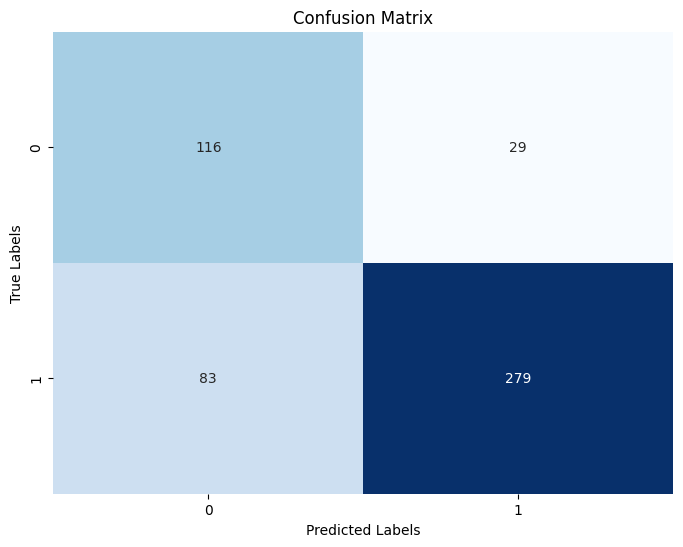

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load dataset yang sudah dilabeli
df = pd.read_excel('BIG_DATA/youtube_label.xlsx')  # Ganti dengan nama file dataset kamu

# Menghapus baris yang memiliki NaN di kolom 'Label'
df = df.dropna(subset=['Label'])

# Misalkan dataset memiliki kolom 'Ulasan' untuk teks dan 'Label' untuk kategori
X = df['Ulasan'].fillna('')  # Fitur teks
y = df['Label']  # Target label

# Menggunakan TF-IDF untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(max_features=1000)  # Atur jumlah fitur sesuai kebutuhan
X_tfidf = vectorizer.fit_transform(X)

# Split data: 70% untuk training, 30% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf = RandomForestClassifier(n_estimators=2, random_state=42)

# Training model
rf.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = rf.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
